In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import pathlib
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfdsimport
from matplotlib import pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
!unzip -q DevanagariHandwrittenCharacterDataset

!mkdir './dataset'
!mkdir './dataset/train'
!mkdir './dataset/test'

!mv './DevanagariHandwrittenCharacterDataset/Train/digit_0' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_1' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_2' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_3' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_4' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_5' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_6' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_7' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_8' './dataset/train/'
!mv './DevanagariHandwrittenCharacterDataset/Train/digit_9' './dataset/train/'

!mv './DevanagariHandwrittenCharacterDataset/Test/digit_0' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_1' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_2' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_3' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_4' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_5' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_6' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_7' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_8' './dataset/test/'
!mv './DevanagariHandwrittenCharacterDataset/Test/digit_9' './dataset/test/'

--2020-09-16 06:46:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip’

DevanagariHandwritt 100%[===================>]  76.69M  20.1MB/s    in 4.3s    

2020-09-16 06:46:22 (17.7 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip’ saved [80417803/80417803]



In [3]:
data_dir = pathlib.Path('./dataset/train')
data_dir2 = pathlib.Path('./dataset/test')
chars = list(data_dir.glob('digit_*/*'))
PIL.Image.open(str(chars[0]))

batch_size = 32
img_height = 180
img_width = 180
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17000 files belonging to 10 classes.
Using 13600 files for training.
Found 3000 files belonging to 10 classes.


tf.Tensor(4, shape=(), dtype=int32)
(180, 180, 3)


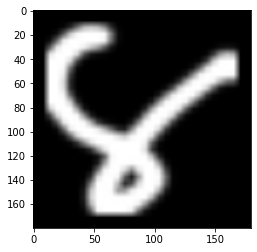

In [4]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train= train_ds.map(lambda x, y: (normalization_layer(x), y))
trainX, trainY = next(iter(normalized_train))

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
testX, testY = next(iter(normalized_test))


plt.imshow(trainX[0])
print(trainY[0])
print(trainX[0].shape)

In [13]:
batch_size = 128  
num_classes = 10
epochs = 40

In [14]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
history = model.fit(
  trainX, trainY,
  validation_data=(testX, testY),
  epochs=epochs,
  verbose=1
)
score = model.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
1/1 [==============================] - 0s 216ms/step - loss: 2.3023 - accuracy: 0.1875 - val_loss: 2.3037 - val_accuracy: 0.1250
Epoch 2/40
1/1 [==============================] - 0s 82ms/step - loss: 2.2887 - accuracy: 0.4062 - val_loss: 2.3138 - val_accuracy: 0.0625
Epoch 3/40
1/1 [==============================] - 0s 82ms/step - loss: 2.2491 - accuracy: 0.2188 - val_loss: 2.3454 - val_accuracy: 0.0625
Epoch 4/40
1/1 [==============================] - 0s 76ms/step - loss: 2.1823 - accuracy: 0.2188 - val_loss: 2.4530 - val_accuracy: 0.0625
Epoch 5/40
1/1 [==============================] - 0s 80ms/step - loss: 2.1030 - accuracy: 0.2188 - val_loss: 2.7353 - val_accuracy: 0.0625
Epoch 6/40
1/1 [==============================] - 0s 81ms/step - loss: 2.0826 - accuracy: 0.2188 - val_loss: 2.9378 - val_accuracy: 0.0625
Epoch 7/40
1/1 [==============================] - 0s 77ms/step - loss: 2.0874 - accuracy: 0.2188 - val_loss: 2.9257 - val_accuracy: 0.0625
Epoch 8/40
1/1 [==========

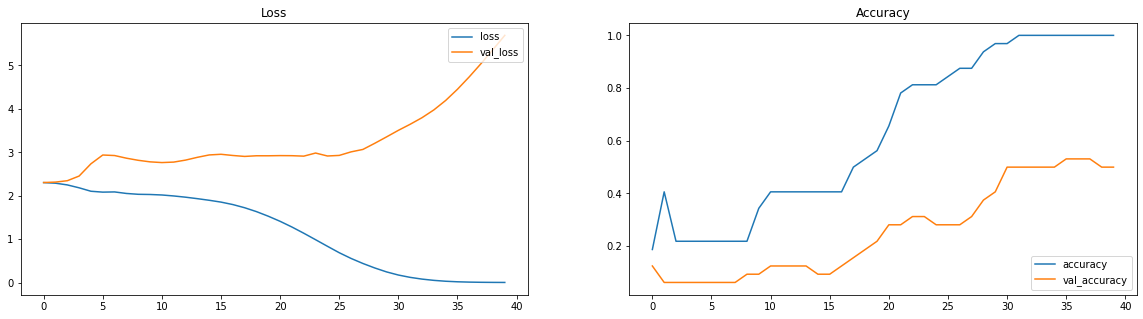

In [16]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(history.history['loss'], label='loss')
axs[0].plot(history.history['val_loss'], label='val_loss')
axs[0].legend(loc="upper right")
axs[0].set_title('Loss')

axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
axs[1].legend(loc="lower right")
axs[1].set_title('Accuracy')

plt.show()